# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [4]:
X, y = generate_dataset()

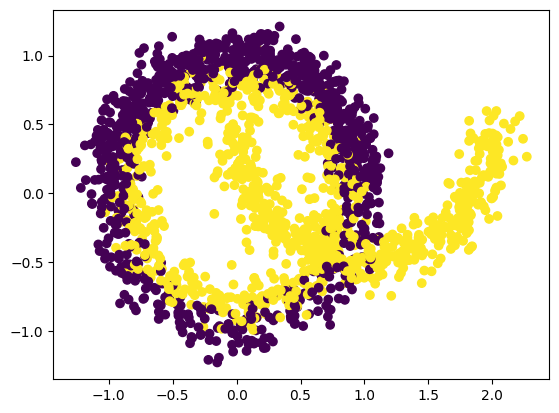

In [5]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
y.value_counts()

y
1    1000
0    1000
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_modeling_pipeline = Pipeline([
    ('ml', RandomForestClassifier())]
)
rf_modeling_pipeline

Pipeline(steps=[('ml', RandomForestClassifier())])

In [17]:
rf_param_grid = [
    {
        'ml__max_depth': [5, 8, 10, 12],
        'ml__n_estimators': [10, 50, 100],
    }
]

In [21]:
from sklearn.model_selection import GridSearchCV

rf_gscv = GridSearchCV(rf_modeling_pipeline, param_grid=rf_param_grid, cv=10, scoring='accuracy', refit=True)
rf_gscv = rf_gscv.fit(X_train, y_train)

In [22]:
rf_gscv.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

In [25]:
from sklearn.metrics import accuracy_score

rf_pred = rf_gscv.predict(X_test)

print(f'Random Forest Test score: {accuracy_score(y_test, rf_pred)}')

Random Forest Test score: 0.8525


### Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# multi-step pipelines don't play as nice with AdaBoost

params = {'estimator__max_depth': [1,2],
         'n_estimators': [50, 100, 200, 400]
         }

#ABC = AdaBoostClassifier(base_estimator=p2)
ABC = AdaBoostClassifier(RandomForestClassifier())


ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='accuracy')
           
ad_gscv = ad_gscv.fit(X_train, y_train)

# print(f'Validation score: {ad_gscv.best_score_:.2%}')

# xtt = processing_pipeline.transform(tX_test)

ad_pred = ad_gscv.predict(X_test)

print(f'Adaboost Test score: {accuracy_score(y_test, ad_pred)}')

KeyboardInterrupt: 

In [27]:
# Bagging classifier

from sklearn.ensemble import BaggingClassifier

rf = RandomForestClassifier()
bclf = BaggingClassifier(rf)

params = {
    'n_estimators': [10, 15, 20],
    'estimator__max_depth':[1, 2, 4, 6], 
    'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5]
}

blrcv = GridSearchCV(bclf, param_grid=params, cv=10, scoring='accuracy')
blrcv = blrcv.fit(X_train, y_train)
bclf_pred = blrcv.predict(X_test)
print(f'Bagging classifier Test score: {accuracy_score(y_test, bclf_pred)}')

Bagging classifier Test score: 0.8475
